# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Carla Carreon-Elisea</p>
# <p style="text-align: right;"> &#9989; Car1ita</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> curl -O "https://github.com/Car1ita/CMSE202-S25-TURNIN.git"

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [17]:
# put your code here
!curl -O https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3721k  100 3721k    0     0  4748k      0 --:--:-- --:--:-- --:--:-- 4752k


In [1]:
import pandas as pd

df=pd.read_csv("diabetes_prediction_dataset.csv")

print(df.head())
print(df.iloc[:, 0]) 

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99995    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 100000, dtype: object


How many patients are in this dataset? What are features of the patients?

<font size=6 color="#009600">&#9998;</font> There are a total 100k patients 

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [2]:
# put your code here
#print(df.head())
df['gender']=df['gender'].replace({'Female':0,'Male':1, 'Other':2})
df['smoking_history'] = df['smoking_history'].replace({'never': 0,'No Info':1,'current':2,'former':3,'ever':4,'not current':5})
#df['smoking_history'] = df['smoking_history'].fillna(0)

print(df.head())
print(df.dtypes)
  

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                0  25.19   
1       0  54.0             0              0                1  27.32   
2       1  28.0             0              0                0  27.32   
3       0  36.0             0              0                2  23.45   
4       1  76.0             1              1                2  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64


C:\Users\Carli\AppData\Local\Temp\ipykernel_2532\2075439444.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace({'Female':0,'Male':1, 'Other':2})
C:\Users\Carli\AppData\Local\Temp\ipykernel_2532\2075439444.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoking_history'] = df['smoking_history'].replace({'never': 0,'No Info':1,'current':2,'former':3,'ever':4,'not current':5})


### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [3]:
# copy your perceptron class to his cell
import numpy as np 

class MyPerceptron():
    def __init__ (self, labeled_data, iters, learning_rate):       
        self.data = np.array(labeled_data)
        self.weights = np.full((self.data.shape[1]), 1.0) # note that this is just an easy way to get "number of features + 1" and set them to 1.0
        self.iters = iters
        self.l_r = learning_rate
        print(self.weights.shape)

       
    def predict(self, feature_set):
        # print("Features: ",feature_set, " weights: ", self.weights[1:])
        res = np.dot(feature_set, self.weights[1:])
        res += self.weights[0]
        return (1 if res > 0 else -1)

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                update = self.l_r * (row[-1] - self.predict(row[:-1]))
                self.weights[1:] += update * row[:-1]
                self.weights[0] += update
 

    def errors(self):
        error_count = 0
        for row in self.data:
            # print("data: ", row[:-1], "actual: ", row[-1], "predict: ", self.predict(row[:-1]), "weights: ", self.weights)
            if (self.predict(row[:-1]) != row[-1]):
                error_count += 1
        print("Accuracy: ", 1.0-(error_count/len(self.data)))
        print("Weights: ", self.weights[1:])
        print("Bias weight:", self.weights[0])
        
df['diabetes']=df['diabetes'].map({0:-1,1:1})

X=df.drop('diabetes',axis=1).values
y=df['diabetes'].values
data=np.column_stack((X,y))
perceptron=MyPerceptron(data,iters=5,learning_rate=0.01)
perceptron.fit()
perceptron.errors()

(9,)
Accuracy:  0.91968
Weights:  [-17.1      3.6512  89.9     56.66    -7.24   -17.4256   2.454    1.84  ]
Bias weight: -201.32000000002918


* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [4]:
# put your code here
from sklearn.model_selection import train_test_split

X=df.drop('diabetes',axis=1).values
y=df['diabetes'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Training features shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

#Create to labels can call perceptron
train_data =np.column_stack((x_train,y_train))
perceptron=MyPerceptron(data,iters=5,learning_rate=0.01)
perceptron.fit()
perceptron.errors()

Training features shape: (70000, 8)
Training labels shape: (70000,)
(9,)
Accuracy:  0.91968
Weights:  [-17.1      3.6512  89.9     56.66    -7.24   -17.4256   2.454    1.84  ]
Bias weight: -201.32000000002918


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [5]:
# put your code here
print("Testing features shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

#Helps predict on each test sample
pred=np.array([perceptron.predict(i) for i in x_test])

test=np.mean(pred == y_test)
print(f"Test set: {test:3f}")
#Testing Perceptron code ChatGPT (OpenAI), April 2025

Testing features shape: (30000, 8)
Testing labels shape: (30000,)
Test set: 0.920367


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [6]:
# put your code here
new_test= MyPerceptron(data,iters=70,learning_rate=0.0005)
perceptron.fit()
perceptron.errors()
test=np.mean(pred == y_test)
print(f"Test set: {test:3f}")

(9,)
Accuracy:  0.92815
Weights:  [-22.54    1.488 136.48   93.32   -5.28  -11.575  18.66    1.86 ]
Bias weight: -380.85999999994357
Test set: 0.920367


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [46]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here
!curl -O https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29048  100 29048    0     0   109k      0 --:--:-- --:--:-- --:--:--  109k


---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [7]:
# put your modified perceptron class here
class MyPerceptron():
    def __init__ (self, labeled_data, iters, learning_rate):       
        self.data = np.array(labeled_data)
        self.weights = np.full((self.data.shape[1]), 1.0) # note that this is just an easy way to get "number of features + 1" and set them to 1.0
        self.iters = iters
        self.l_r = learning_rate
        print(self.weights.shape)

       
    def predict(self, feature_set):
        # print("Features: ",feature_set, " weights: ", self.weights[1:])
        res = np.dot(feature_set, self.weights[1:])
        res += self.weights[0]
        return (1 if res > 0 else -1)

    def score(self,feature_set):
        return np.dot(feature_set,self.weights[1:]) + self.weights[0]

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                update = self.l_r * (row[-1] - self.predict(row[:-1]))
                self.weights[1:] += update * row[:-1]
                self.weights[0] += update
 

    def errors(self):
        error_count = 0
        for row in self.data:
            # print("data: ", row[:-1], "actual: ", row[-1], "predict: ", self.predict(row[:-1]), "weights: ", self.weights)
            if (self.predict(row[:-1]) != row[-1]):
                error_count += 1
        print("Accuracy: ", 1.0-(error_count/len(self.data)))
        print("Weights: ", self.weights[1:])
        print("Bias weight:", self.weights[0])

* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [8]:
# put your code here
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)


classes = np.unique(train_y)
sets = {}
for cls in classes:
    y_train_c = np.where(train_y == cls, +1, -1)
    y_test_c  = np.where(test_y  == cls, +1, -1)
    sets[cls] = (y_train_c, y_test_c)

* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [9]:
# put your code here

perceptrons = {}
accuracies = {}
#ChatGPT was used here
for cls in sets:                   
    y, _    = sets[cls]          
    train_data = np.column_stack((train_x, y))
    
    p = MyPerceptron(train_data, iters=50, learning_rate=0.01)
    p.fit()
    perceptrons[cls] = p
    
    # compute training accuracy with an inner loop over examples
    #ChatGPT was used here..
    errors = 0
    for x_i, true_label in zip(train_x, y):
        if p.predict(x_i) != true_label:
            errors += 1
    acc = 1 - errors/len(y)
    accuracies[cls] = acc
    
    print(f"Class {cls} training accuracy: {acc:.3f}")

    
#Testing/Training Perceptron code for 5 classes ChatGPT (OpenAI), April 2025

(9,)
Class -1 training accuracy: 0.935
(9,)
Class 1 training accuracy: 0.924


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [10]:
# put your code here
per=[]

for i in test_x:
    scores ={cls:perceptrons[cls].score(x_i) for cls in perceptrons}
    predc=max(scores,key=scores.get)
    per.append(predc)

per = np.array(per)
testa=np.mean(np.array(per) == test_y)
print(f"Test Accuracy: {testa:.3f}")

Test Accuracy: 0.915


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> Based on the training and the testing done you get a accuracy of 0.915 meaning that about 90% of the testing was fairly accurate.


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [51]:
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (100000, 8)
y.shape: (70000,)


In [11]:
# put your code here.
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_sub = X[:200]    
y_sub = y[:200]    
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub,test_size=0.3,
random_state=42,stratify=y_sub)

param_grid= {"C" :[1e-2,1e-1,1e0,1e1],
             'gamma': [1e-4, 1e-3, 1e-2, 1e-1],
             'kernel':  ['linear', 'rbf'] }

clf = GridSearchCV(
    estimator=SVC(class_weight="balanced"),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)
                 
print("Fitting the calssifier")
clf.fit(X_train,y_train)
print("→ Best parameters:", clf.best_params_)
print("→ Best CV score:  ", clf.best_score_)

Fitting the calssifier
Fitting 5 folds for each of 32 candidates, totalling 160 fits
→ Best parameters: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
→ Best CV score:   0.9357142857142857


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

Test Accuracy: 0.933333
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        56
           1       0.00      0.00      0.00         4

    accuracy                           0.93        60
   macro avg       0.47      0.50      0.48        60
weighted avg       0.87      0.93      0.90        60



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


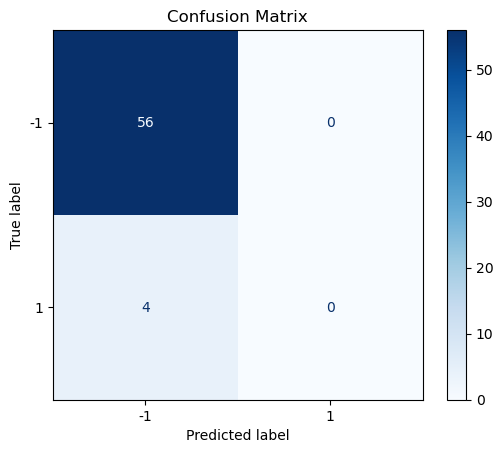

In [ ]:
# put your code here
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt


y_pred=clf.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print(f"Test Accuracy: {acc:3f}")
print(classification_report(y_test, y_pred))

cm=ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=clf.classes_, cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

#Used to create the examination was running into errorsChatGPT (OpenAI), April 2025

Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> Based on the accuracy score from both SVM and the perceptron 

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




In [ ]:
# put your code here



Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University